In [917]:
# source https://github.com/nachi-hebbar/Time-Series-Forecasting-LSTM/blob/main/RNN_Youtube.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

SyntaxError: invalid syntax (3355453718.py, line 1)

In [ ]:
df = pd.read_csv("monthly_milk_production.csv", index_col="Date", parse_dates=True)
df = pd.read_csv(
    "C:/Users/admin/Masters-s-project/masters_project/machine_learning/data_analysis/air_pollution_smog_clear.csv",
    index_col="date",
    parse_dates=True,
)
df = df[["humidity"]]
# df = df.resample('12H').mean()
df.head()

,humidity
date,
2021-11-12 20:30:17,39.31152
2021-11-12 20:30:35,39.24609
2021-11-12 20:30:52,39.18848
2021-11-12 20:31:10,39.74805
2021-11-12 20:31:41,39.12109


In [ ]:
df.head()

,humidity
date,
2021-11-12 20:30:17,39.31152
2021-11-12 20:30:35,39.24609
2021-11-12 20:30:52,39.18848
2021-11-12 20:31:10,39.74805
2021-11-12 20:31:41,39.12109


<AxesSubplot:xlabel='date'>

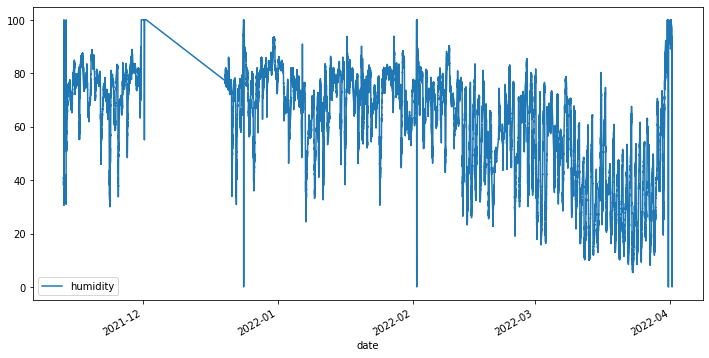

In [ ]:
df.plot(figsize=(12, 6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# results = seasonal_decompose(df[['PM1']])
# results.plot()

In [ ]:
len(df)

260383

In [ ]:
train = df.iloc[:156]
test = df.iloc[156:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
df.head(), df.tail()

(                     humidity
 date                         
 2021-11-12 20:30:17  39.31152
 2021-11-12 20:30:35  39.24609
 2021-11-12 20:30:52  39.18848
 2021-11-12 20:31:10  39.74805
 2021-11-12 20:31:41  39.12109,
                      humidity
 date                         
 2022-04-01 13:48:50  78.59277
 2022-04-01 13:49:26  80.68555
 2022-04-01 13:50:01  82.28027
 2022-04-01 13:50:34  83.14063
 2022-04-01 13:51:16  82.50684)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.12614598],
       [0.12520385],
       [0.12437433],
       [0.13243158],
       [0.12340398],
       [0.1227291 ],
       [0.12856458],
       [0.12194161],
       [0.12109798],
       [0.12097141]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(
    scaled_train, scaled_train, length=n_input, batch_size=1
)

In [ ]:
X, y = generator[0]
print(f"Given the Array: \n{X.flatten()}")
print(f"Predict this y: \n {y}")

Given the Array: 
[0.12614598 0.12520385 0.12437433]
Predict this y: 
 [[0.13243158]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(
    scaled_train, scaled_train, length=n_input, batch_size=1
)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation="relu", input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 100)               40800     
                                                                 
 dense_25 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator, epochs=75)

Epoch 1/50
144/144 [==============================] - 6s 33ms/step - loss: 0.0368
Epoch 2/50
144/144 [==============================] - 5s 34ms/step - loss: 0.0266
Epoch 3/50
144/144 [==============================] - 4s 28ms/step - loss: 0.0252
Epoch 4/50
144/144 [==============================] - 4s 30ms/step - loss: 0.0241
Epoch 5/50
144/144 [==============================] - 4s 30ms/step - loss: 0.0237
Epoch 6/50
144/144 [==============================] - 4s 29ms/step - loss: 0.0228
Epoch 7/50
144/144 [==============================] - 4s 27ms/step - loss: 0.0229
Epoch 8/50
144/144 [==============================] - 4s 29ms/step - loss: 0.0228
Epoch 9/50
144/144 [==============================] - 4s 29ms/step - loss: 0.0209
Epoch 10/50
144/144 [==============================] - 4s 30ms/step - loss: 0.0211
Epoch 11/50
144/144 [==============================] - 4s 29ms/step - loss: 0.0205
Epoch 12/50
144/144 [==============================] - 4s 28ms/step - loss: 0.0198
Epoch 13/50
1

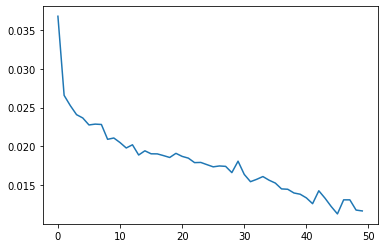

In [ ]:
loss_per_epoch = model.history.history["loss"]
plt.figure()
# figure.
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
# plt.figure.savefig("PM1,25.png")

In [ ]:
# last_train_batch = scaled_train[-12:]

In [ ]:
# last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
# model.predict(last_train_batch)

In [ ]:
# scaled_test[0]

In [ ]:
# test_predictions = []

# first_eval_batch = scaled_train[-n_input:]
# current_batch = first_eval_batch.reshape((1, n_input, n_features))

# for i in range(len(test)):

#     # get the prediction value for the first batch
#     current_pred = model.predict(current_batch)[0]

#     # append the prediction into the array
#     test_predictions.append(current_pred)

#     # use the prediction to update the batch and remove the first value
#     current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
# test_predictions

In [ ]:
# test.head()

In [ ]:
# true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
# test['Predictions'] = true_predictions

In [ ]:
# test.plot(figsize=(14,5))

In [ ]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
# print(rmse)